In [1]:
import pandas as pd 

In [2]:
df_final_demo = pd.read_csv("/Users/laurasuemitsu/Desktop/DATA_FT_May_2025/Week 5/Project/df_final_demo.txt")

df_final_demo.to_csv('df_fd.csv', index = False)

In [3]:
df_fd = pd.read_csv("/Users/laurasuemitsu/Desktop/DATA_FT_May_2025/Week 5/Project/df_fd.csv")

## Dataset exploration

In [4]:
df_fd.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [5]:
df_fd.shape

(70609, 9)

In [6]:
df_fd.dtypes

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

In [7]:
df_fd.select_dtypes("float").nunique().sort_values(ascending=False)
# didn't use number as dtype, because the client_id variable is for sure a categorical variable

bal                 70327
clnt_tenure_mnth      482
clnt_age              165
clnt_tenure_yr         54
logons_6_mnth           9
num_accts               8
calls_6_mnth            8
dtype: int64

In [8]:
df_fd_num = df_fd.drop(columns=["client_id", "gendr"])

df_fd_num.head()

,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
0,6.0,73.0,60.5,2.0,45105.30,6.0,9.0
1,7.0,94.0,58.0,2.0,110860.30,6.0,9.0
2,5.0,64.0,32.0,2.0,52467.79,6.0,9.0
3,16.0,198.0,49.0,2.0,67454.65,3.0,6.0
4,12.0,145.0,33.0,2.0,103671.75,0.0,3.0


In [9]:
df_fd_cat = df_fd.drop(df_fd_num, axis = 1)
df_fd_cat.head()

,client_id,gendr
0,836976,U
1,2304905,U
2,1439522,U
3,1562045,M
4,5126305,F


In [10]:
df_fd.duplicated().sum()

0

#### **No duplicates in the dataframe**.

In [11]:
df_fd.isnull().sum().sort_values(ascending=False)

clnt_age            15
clnt_tenure_yr      14
clnt_tenure_mnth    14
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
client_id            0
dtype: int64

In [12]:
df_fd_clean =df_fd[df_fd.columns[df_fd.isnull().mean() < 0.80]]
df_fd_clean.shape

(70609, 9)

#### **No columns were dropped from the dataframe due to more than 80% of null values**.

## Client behavior analysis

- Who are the primary clients using this online process?
- Are the primary clients younger or older, new or long-standing?

Determining what primary clients are using the online process:

In [13]:
# Checking how many times clients log onto it:

df_fd["logons_6_mnth"].unique()

array([ 9.,  6.,  3.,  5.,  4.,  8.,  7., nan,  1.,  2.])

In [ ]:
# Defining primary clients as those who have more than 6 logons:

df_pc =df_fd[df_fd["logons_6_mnth"] > 6]

df_pc.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
9,8198645,15.0,189.0,54.5,F,2.0,382303.83,6.0,9.0
11,2537139,8.0,99.0,51.5,U,2.0,135940.68,6.0,9.0


In [15]:
mean_age = round(df_pc["clnt_age"].mean(), 1)
median_age = df_pc["clnt_age"].median()
mode_age = df_pc["clnt_age"].mode()

mean_age, median_age, mode_age

(47.5,
 48.5,
 0    28.5
 Name: clnt_age, dtype: float64)

In [16]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

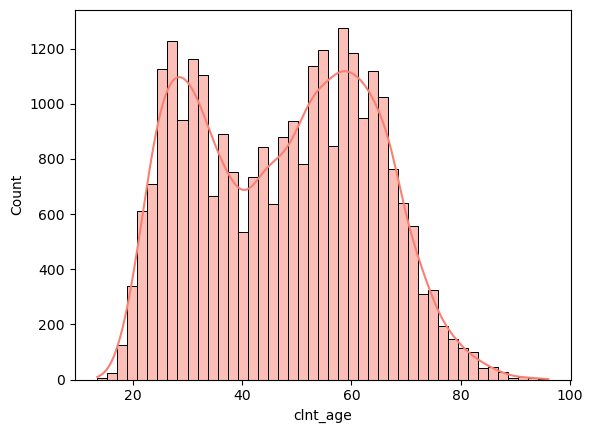

In [17]:
sns.histplot(df_pc["clnt_age"], kde = True, color = "salmon")
plt.show()

In [18]:
df_mean_age = df_pc.groupby("logons_6_mnth")["clnt_age"].apply(pd.Series.mode)
df_mean_age.head(10)

logons_6_mnth   
7.0            0    23.5
               1    59.0
8.0            0    61.5
9.0            0    27.5
Name: clnt_age, dtype: float64

In [19]:
max_age = df_pc["clnt_age"].max()
min_age = df_pc["clnt_age"].min()
range_age = max_age - min_age

max_age, min_age, range_age

(96.0, 13.5, 82.5)

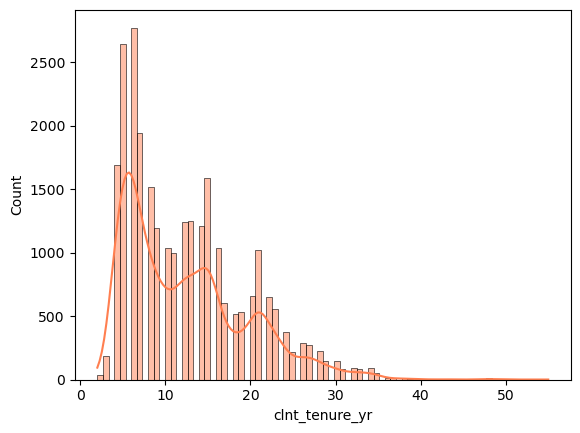

In [20]:
sns.histplot(df_pc["clnt_tenure_yr"], kde = True, color = "coral")
plt.show()

In [21]:
mean_tenure = round(df_pc["clnt_tenure_yr"].mean(), 1)
median_tenure = df_pc["clnt_tenure_yr"].median()
mode_tenure = df_pc["clnt_tenure_yr"].mode()

mean_tenure, median_tenure, mode_tenure

(12.4,
 11.0,
 0    6.0
 Name: clnt_tenure_yr, dtype: float64)

In [44]:
max_bal = df_pc["bal"].max()
min_bal = df_pc["bal"].min()
range = max_bal - min_bal

mean_bal = round(df_pc["bal"].mean(), 2)
median_bal = df_pc["bal"].median()
mode_bal = df_pc["bal"].mode()

max_bal, min_bal, range, mean_bal, median_bal

(16320040.15, 13791.8, 16306248.35, 205868.74, 86568.95)

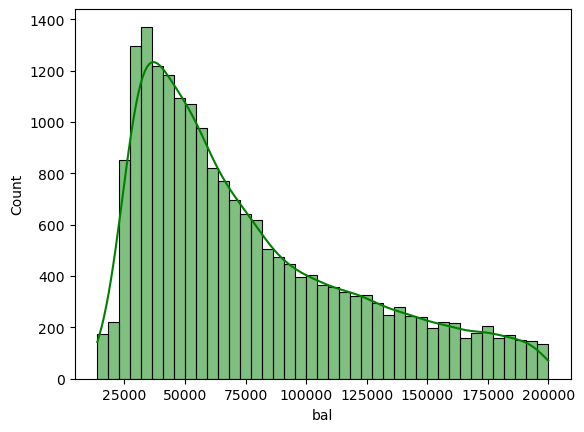

In [37]:
df_bal = df_pc[df_pc["bal"] < 200000]
sns.histplot(df_bal["bal"], kde = True, color="green")
plt.show()
